In [1]:
# https://lips.cs.princeton.edu/the-poisson-estimator/

import numpy as np
import matplotlib.pyplot as plt

In [62]:
# say we want to calculate e^E(X), where X ~ N(0, 1). That should be 1.

In [178]:
# naive method
def naive_method(N):
    x = np.random.normal(0, 1, N)
    x_hat = x.mean()
    return np.exp(x_hat)

def possion_estimator(delta):
    J = np.random.poisson(delta)
    x = np.random.normal(0, 1, J)
    return np.prod(x / delta) * np.exp(delta)

def k_trial(k, method, N=10):
    return np.array([method(N) for _ in range(k)])

In [185]:
res_mean = []
res_std = []
for k in [10, 100, 1000, 10000, 100000, 1000000]:
    res = k_trial(k, naive_method)
    res_mean.append(res.mean())
    res_std.append(res.std()/np.sqrt(k))

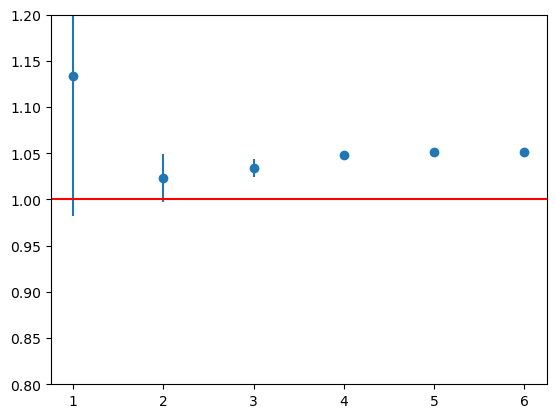

In [186]:
# lower variance but biased
plt.errorbar(np.log10([10, 100, 1000, 10000, 100000, 1000000]), res_mean, yerr=res_std, fmt='o')
plt.ylim(0.8, 1.2)
plt.axhline(1, color='r')

In [187]:
res_mean = []
res_std = []
for k in [10, 100, 1000, 10000, 100000, 1000000]:
    res = k_trial(k, possion_estimator, N=1)
    res_mean.append(res.mean())
    res_std.append(res.std()/np.sqrt(k))

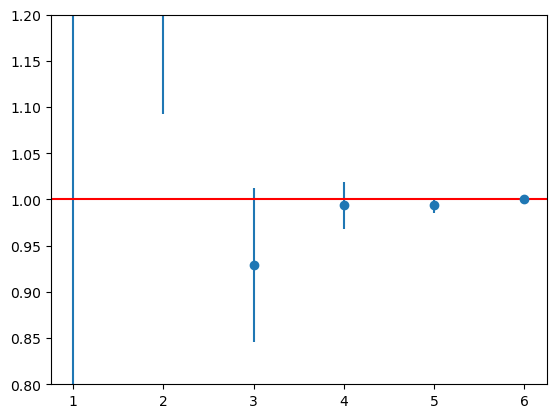

In [191]:
# larger variance but unbiased
plt.errorbar(np.log10([10, 100, 1000, 10000, 100000, 1000000]), res_mean, yerr=res_std, fmt='o')
plt.ylim(0.8, 1.2)
plt.axhline(1, color='r')